<a href="https://colab.research.google.com/github/chatterjeerajdeep/explore-machine-learning/blob/main/LSTM_stock_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


I want to apply LSTM model on a real life stock price prediction data set. So I downloaded the data from https://finance.yahoo.com/quote/ and I chose data for Gold prices.

In [2]:
df = pd.read_csv("/content/Gold_large.csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-08-30,273.899994,273.899994,273.899994,273.899994,273.899994,0.0
1,2000-08-31,274.799988,278.299988,274.799988,278.299988,278.299988,0.0
2,2000-09-01,277.000000,277.000000,277.000000,277.000000,277.000000,0.0
3,2000-09-04,NaN,NaN,NaN,NaN,NaN,NaN
4,2000-09-05,275.799988,275.799988,275.799988,275.799988,275.799988,2.0


In [3]:
# how many data points are we having?
df.shape

(5266, 7)

In [4]:
# any non numeric type that I might need to worry about?
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [5]:
# any missing values?
df.isnull().sum()

Date           0
Open         112
High         112
Low          112
Close        112
Adj Close    112
Volume       112
dtype: int64

In [6]:
# looks like 112 rows of data are blank. So let's get rid of them
df = df.dropna()

In [7]:
# checking to be sure
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [8]:
# we want to predict the closing value of the prices, so that is going to be our data of concern
data = df["Close"].values

In [9]:
# reshaping the data because numpy wants it!
data = data.reshape(-1,1)

In [10]:
from sklearn.preprocessing import MinMaxScaler

In [11]:
# need to normalise the data so that the model doesn't get puzzled

scaler = MinMaxScaler(feature_range = (0, 1))
scaled_data = scaler.fit_transform(data)

In [12]:
# a manual train test split

train_set = scaled_data[:3500]
test_set = scaled_data[3500:]

In [13]:
# preparing the sequence data
X_train = []
y_train = []

for i in range(0, 3450):
  X_train.append(train_set[i:i+50, 0])
  y_train.append(train_set[i+50, 0])

In [14]:
# making the data ready to be consumed by the model
X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
print(X_train.shape, y_train.shape)


(3450, 50, 1) (3450,)


In [16]:
X_test = []
y_test = []

for i in range(0, 1450):
  X_test.append(test_set[i:i+50, 0])
  y_test.append(test_set[i+50, 0])

In [17]:
# same data preparation for test data
X_test = np.array(X_test)
y_test = np.array(y_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [18]:
model = Sequential()
#Adding the LSTM layers
model.add(LSTM(units = 16, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(LSTM(units = 8))
# Adding the output layer
model.add(Dense(units = 1))
# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')
# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 10, batch_size = 16)

Epoch 1/10
216/216 [==============================] - 10s 32ms/step - loss: 0.0375
Epoch 2/10
216/216 [==============================] - 7s 34ms/step - loss: 3.7447e-04
Epoch 3/10
216/216 [==============================] - 7s 34ms/step - loss: 3.4099e-04
Epoch 4/10
216/216 [==============================] - 7s 34ms/step - loss: 2.9416e-04
Epoch 5/10
216/216 [==============================] - 7s 34ms/step - loss: 2.8174e-04
Epoch 6/10
216/216 [==============================] - 7s 34ms/step - loss: 2.5276e-04
Epoch 7/10
216/216 [==============================] - 7s 34ms/step - loss: 2.6608e-04
Epoch 8/10
216/216 [==============================] - 8s 35ms/step - loss: 2.1182e-04
Epoch 9/10
216/216 [==============================] - 8s 35ms/step - loss: 2.4693e-04
Epoch 10/10
216/216 [==============================] - 8s 35ms/step - loss: 2.0004e-04


In [19]:
from matplotlib import pyplot as plt

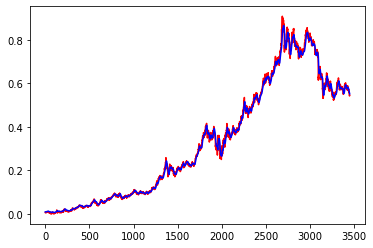

In [20]:
# visualising the model output on train data
y_hat = model.predict(X_train)
plt.plot(y_train[:], 'r')
plt.plot(y_hat[:],'b')

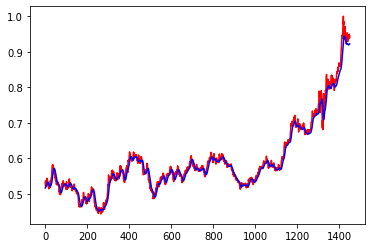

In [21]:
# visualising the model output on test data
y_hat = model.predict(X_test)
plt.plot(y_test[:], 'r')
plt.plot(y_hat[:], 'b')